# Data

The data originally has been retrieved from a free for use repository at: https://archive.ics.uci.edu/ml/datasets/Beijing+PM2.5+Data

In [1]:
import numpy as np
import pandas as pd
from pylab import rcParams
import statsmodels.api as sm
import matplotlib.pyplot as plt

# References that could help understand the essence of the executions performed:
# https://towardsdatascience.com/an-end-to-end-project-on-time-series-analysis-and-forecasting-with-python-4835e6bf050b
# https://stackoverflow.com/questions/42425774/using-statsmodels-seasonal-decompose-without-datetimeindex-but-with-known-freq?noredirect=1&lq=1

In [2]:
df = pd.read_csv('PRSA_data_2010.1.1-2014.12.31_Original.csv')
df_new = df["TEMP"]

# Missing data
print("Amount of data points: \t\t{}".format(len(df_new)))
print("Amount of missing data: \t{}".format(df_new.isnull().sum()))
print("Amount of not missing data: \t{}".format(df_new.notnull().sum()))

Amount of data points: 		43824
Amount of missing data: 	0
Amount of not missing data: 	43824


In [3]:
#Check for the amounts and possible repeats
hours_dict = {}
for hour in df["hour"]:
    if hour not in hours_dict:
        hours_dict[hour] = 1
    else:
        hours_dict[hour] += 1
        
days_dict = {}
for day in df["day"]:
    if day not in days_dict:
        days_dict[day] = 1
    else:
        days_dict[day] += 1
        
months_dict = {}
for month in df["month"]:
    if month not in months_dict:
        months_dict[month] = 1
    else:
        months_dict[month] += 1
        
years_dict = {}
for year in df["year"]:
    if year not in years_dict:
        years_dict[year] = 1
    else:
        years_dict[year] += 1
        
print("Dictionary for hours: \n\n{}\n".format(hours_dict))
print("Dictionary for days: \n\n{}\n".format(days_dict))
print("Dictionary for months: \n\n{}\n".format(months_dict))
print("Dictionary for years: \n\n{}\n".format(years_dict))

Dictionary for hours: 

{0: 1826, 1: 1826, 2: 1826, 3: 1826, 4: 1826, 5: 1826, 6: 1826, 7: 1826, 8: 1826, 9: 1826, 10: 1826, 11: 1826, 12: 1826, 13: 1826, 14: 1826, 15: 1826, 16: 1826, 17: 1826, 18: 1826, 19: 1826, 20: 1826, 21: 1826, 22: 1826, 23: 1826}

Dictionary for days: 

{1: 1440, 2: 1440, 3: 1440, 4: 1440, 5: 1440, 6: 1440, 7: 1440, 8: 1440, 9: 1440, 10: 1440, 11: 1440, 12: 1440, 13: 1440, 14: 1440, 15: 1440, 16: 1440, 17: 1440, 18: 1440, 19: 1440, 20: 1440, 21: 1440, 22: 1440, 23: 1440, 24: 1440, 25: 1440, 26: 1440, 27: 1440, 28: 1440, 29: 1344, 30: 1320, 31: 840}

Dictionary for months: 

{1: 3720, 2: 3384, 3: 3720, 4: 3600, 5: 3720, 6: 3600, 7: 3720, 8: 3720, 9: 3600, 10: 3720, 11: 3600, 12: 3720}

Dictionary for years: 

{2010: 8760, 2011: 8760, 2012: 8784, 2013: 8760, 2014: 8760}



In [4]:
#Individualistic dictionaries

#Check for the amounts and possible repeats
#By using a memory state that checks if the numbers are not repeated a second time in a row

#Method obviously does not apply to hours, but for comparison could be used to check whether no
#Repeating hours are tracked

memory = None
hours_dict_2 = {}
for hour in df["hour"]:
    if memory == hour:
        continue
    else:
        memory = year
    if hour not in hours_dict_2:
        hours_dict_2[hour] = 1
    else:
        hours_dict_2[hour] += 1
        
memory = None
days_dict = {}
for day in df["day"]:
    if memory == day:
        continue
    else:
        memory = day
    if day not in days_dict:
        days_dict[day] = 1
    else:
        days_dict[day] += 1
        
memory = None
months_dict = {}
for month in df["month"]:
    if memory == month:
        continue
    else:
        memory = month
    if month not in months_dict:
        months_dict[month] = 1
    else:
        months_dict[month] += 1
        
memory = None
years_dict = {}
for year in df["year"]:
    if memory == year:
        continue
    else:
        memory = year
    if year not in years_dict:
        years_dict[year] = 1
    else:
        years_dict[year] += 1
        
print("Dictionary for hours: \n\n{}\n".format(hours_dict_2))
print("Dictionary for days: \n\n{}\n".format(days_dict))
print("Dictionary for months: \n\n{}\n".format(months_dict))
print("Dictionary for years: \n\n{}\n".format(years_dict))

Dictionary for hours: 

{0: 1826, 1: 1826, 2: 1826, 3: 1826, 4: 1826, 5: 1826, 6: 1826, 7: 1826, 8: 1826, 9: 1826, 10: 1826, 11: 1826, 12: 1826, 13: 1826, 14: 1826, 15: 1826, 16: 1826, 17: 1826, 18: 1826, 19: 1826, 20: 1826, 21: 1826, 22: 1826, 23: 1826}

Dictionary for days: 

{1: 60, 2: 60, 3: 60, 4: 60, 5: 60, 6: 60, 7: 60, 8: 60, 9: 60, 10: 60, 11: 60, 12: 60, 13: 60, 14: 60, 15: 60, 16: 60, 17: 60, 18: 60, 19: 60, 20: 60, 21: 60, 22: 60, 23: 60, 24: 60, 25: 60, 26: 60, 27: 60, 28: 60, 29: 56, 30: 55, 31: 35}

Dictionary for months: 

{1: 5, 2: 5, 3: 5, 4: 5, 5: 5, 6: 5, 7: 5, 8: 5, 9: 5, 10: 5, 11: 5, 12: 5}

Dictionary for years: 

{2010: 1, 2011: 1, 2012: 1, 2013: 1, 2014: 1}



In [5]:
#Data is Exceptionally clean
hours_dict == hours_dict_2

True

In [6]:
#Save the temperature data to later process for the networks
temperature_exp = df_new.to_csv (r'temperature_exp.csv', index = None, header= False)

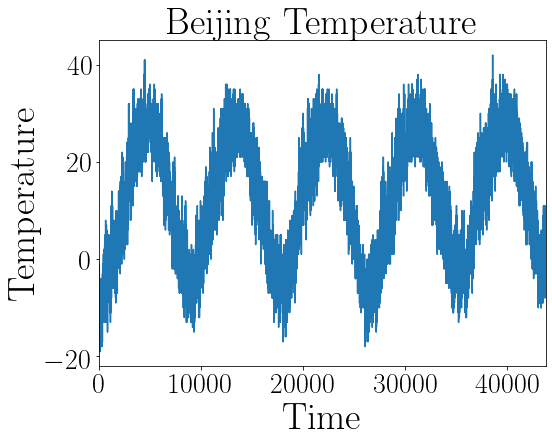

In [8]:
#Trends
data = pd.Series(df_new)
data.plot(figsize=(8, 6))
# f = plt.figure(figsize=(8, 6), dpi=80)
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
MEDIUM_SIZE = 28
plt.rc('font', size = MEDIUM_SIZE)      
plt.rc('axes', titlesize = MEDIUM_SIZE)     
plt.rc('axes', labelsize = MEDIUM_SIZE)    
plt.rc('xtick', labelsize = MEDIUM_SIZE)    
plt.rc('ytick', labelsize = MEDIUM_SIZE)    
plt.rc('legend', fontsize = MEDIUM_SIZE)    
plt.rc('figure', titlesize = MEDIUM_SIZE)
# plt.xlabel("Time", fontsize=MEDIUM_SIZE)
# plt.ylabel("Price", fontsize=MEDIUM_SIZE)
plt.xlabel("Time", fontsize=38)
plt.ylabel("Temperature", fontsize=38)
plt.title("Beijing Temperature", fontsize=38)
plt.savefig("BeijingTemperature.pdf", bbox_inches='tight')
plt.show()

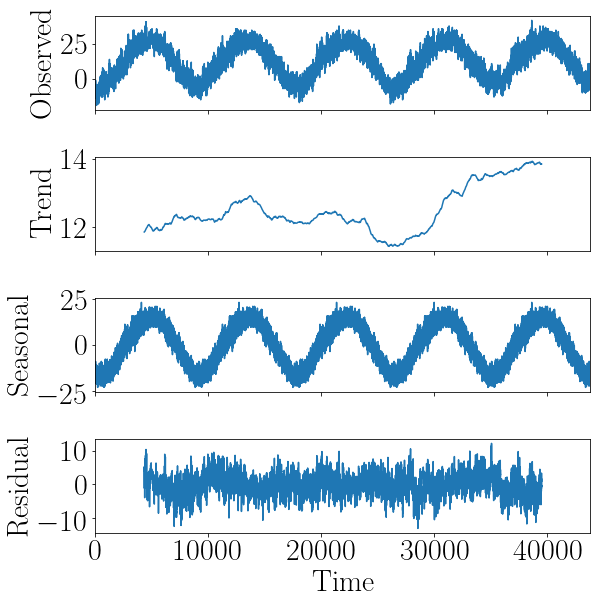

In [10]:
decomposed = sm.tsa.seasonal_decompose(data.values, freq=8640, model='additive')
f = decomposed.plot()
plt.rcParams['figure.figsize'] = (9, 9)
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
MEDIUM_SIZE = 30
plt.rc('font', size = MEDIUM_SIZE)      
plt.rc('axes', titlesize = MEDIUM_SIZE)     
plt.rc('axes', labelsize = MEDIUM_SIZE)    
plt.rc('xtick', labelsize = MEDIUM_SIZE)    
plt.rc('ytick', labelsize = MEDIUM_SIZE)    
plt.rc('legend', fontsize = MEDIUM_SIZE)    
plt.rc('figure', titlesize = MEDIUM_SIZE)
plt.xlabel("Time", fontsize=MEDIUM_SIZE)
# plt.ylabel("Price", fontsize=MEDIUM_SIZE)
# plt.xlabel("Time", fontsize=MEDIUM_SIZE)
f.savefig("BeijingSeasonal.pdf", bbox_inches='tight')
# f.savefig("Seasonal Decomposition.pdf")
plt.show()

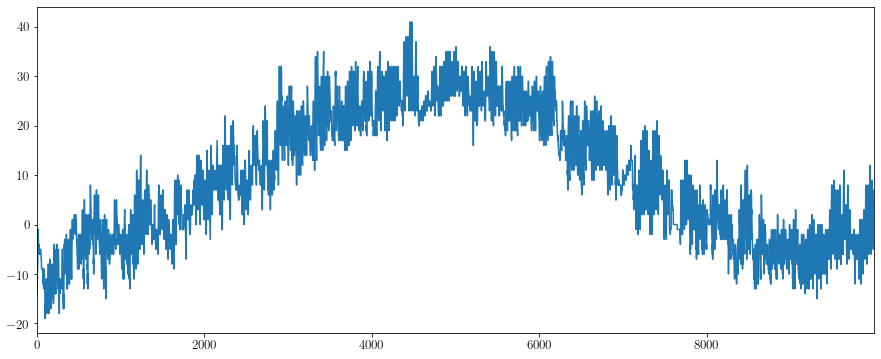

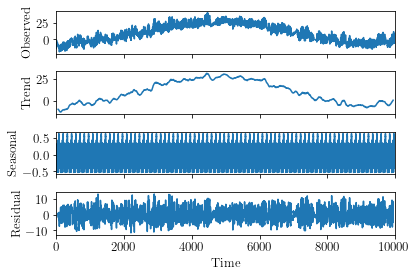

In [14]:
#Trends Closer
data_redux = pd.Series(df_new[:10000])
data_redux.plot(figsize=(15, 6))
plt.show()

decomposed = sm.tsa.seasonal_decompose(data_redux.values, freq=125, model='additive')
f = decomposed.plot()
# f.savefig("Seasonal Decomposition.pdf")
plt.show()

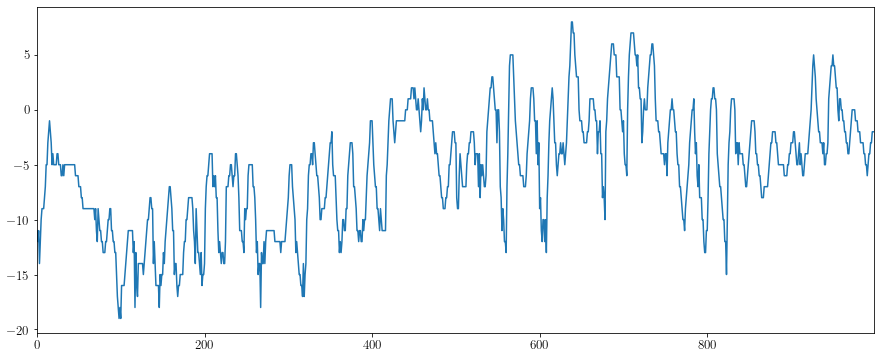

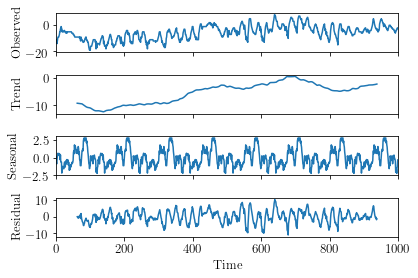

In [15]:
#Trends Closer
data_redux2 = pd.Series(df_new[:1000])
data_redux2.plot(figsize=(15, 6))
plt.show()

decomposed = sm.tsa.seasonal_decompose(data_redux2.values, freq=125, model='additive')
f = decomposed.plot()
# f.savefig("Seasonal Decomposition.pdf")
plt.show()